In [492]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [493]:
 ##PyTorch Workflow

import torch
from torch import nn ## nn contains building blocks for our neural network
import matplotlib.pyplot as plt

In [494]:
weight = 0.7
bias = 0.3

#Create a dataset
start = 0
end =  1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim =  1)
y=  weight * X + bias

In [495]:
#Create a train/test split
train_split = int(0.8* len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

In [496]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c= "b",s = 4, label = "Training data")
    plt.scatter(test_data, test_labels, c= "g",s = 4, label = "Test data")

    if predictions is not None:
        plt.scatter(test_data,predictions, c= "r", label = "Predictions")

    plt.legend(prop = {"size" : 14});
    plt.show()
    

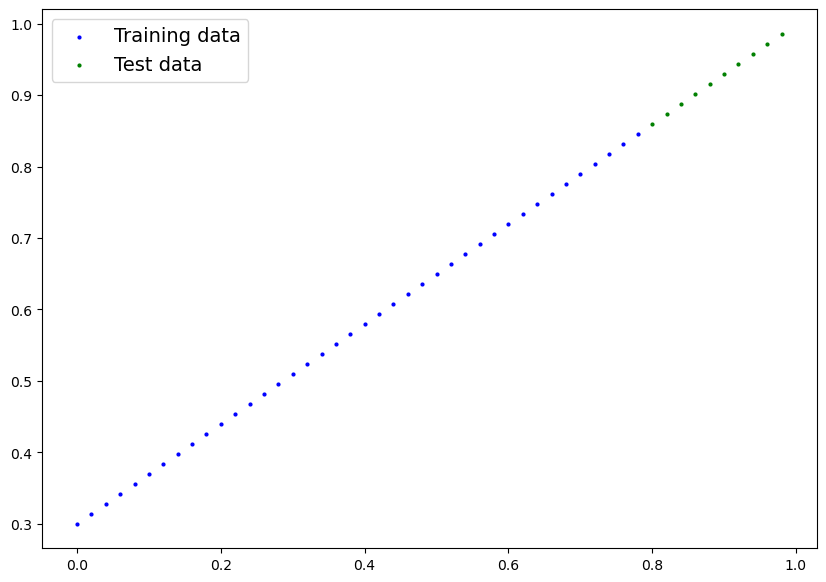

In [497]:
plot_predictions()

In [498]:
#Try to build our first model(linear regression)

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))

  #Forward method to define the computation in our model
  def forward(self, x:torch.Tensor) -> torch.Tensor: #Read as self, x takes in torch.Tensor as input, and return torch.Tensor as output
    return self.weights * x + self.bias

In [499]:
torch.manual_seed(67)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([1.9416], requires_grad=True),
 Parameter containing:
 tensor([-1.3425], requires_grad=True)]

In [500]:
## Make preds without optimizing, currently our w and b are random

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.2108],
        [0.2496],
        [0.2885],
        [0.3273],
        [0.3661],
        [0.4049],
        [0.4438],
        [0.4826],
        [0.5214],
        [0.5603]])

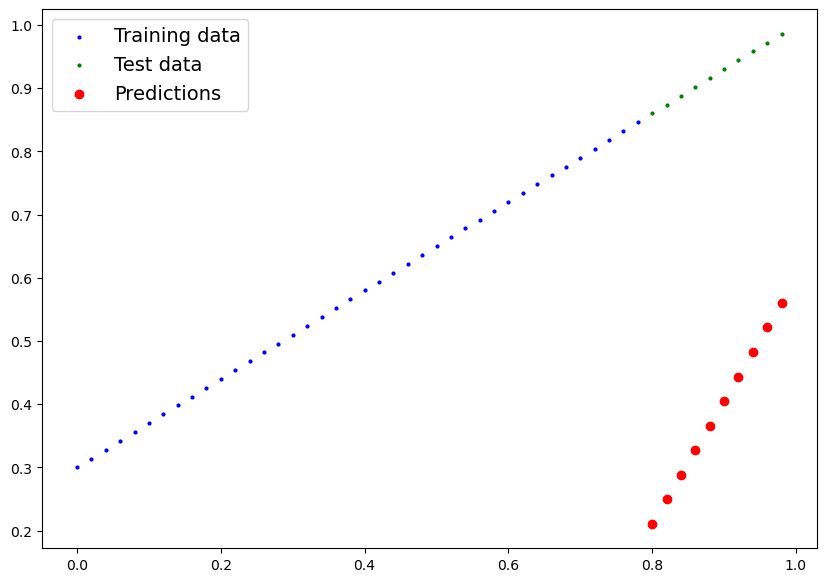

In [501]:
plot_predictions(predictions= y_preds)

In [502]:
## Use a loss function to know how good our model's doing
loss_fn = nn.L1Loss()

#optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr= 0.01)

In [503]:
#Building a training loop
torch.manual_seed(67)

#Track different values
epoch_count = []
loss_values = []
test_loss_values = []

epochs =1000

for epoch in range(epochs):

  model_0.train() ##Setting our mode to training mode, i.e. requires grad = True works unlike in inference mode

  y_pred = model_0(X_train) #1. Forward propagation step

  loss = loss_fn(y_pred,y_train) #2. Calculate the loss

  optimizer.zero_grad() #3. basically done to reset our optimizer value to zero rather then it accumulating

  loss.backward() #4. Perform Backpropagation on the loss with respect to the params of the model

  optimizer.step() #5. Perform the optimization step



  model_0.eval()#setting our mode so that gradient tracking is disabled

  with torch.inference_mode():
    test_pred = model_0(X_test) #forward pass

    test_loss = loss_fn(test_pred,y_test) # Calculate the loss

  #Print whats happening
  if(epoch%100  == 0):
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Test: 1.1582505702972412 | Test Loss: 0.5239956974983215
OrderedDict({'weights': tensor([1.9455]), 'bias': tensor([-1.3325])})
Epoch: 100 | Test: 0.34665942192077637 | Test Loss: 0.5229480266571045
OrderedDict({'weights': tensor([2.2061]), 'bias': tensor([-0.5175])})
Epoch: 200 | Test: 0.2834629714488983 | Test Loss: 0.6325370073318481
OrderedDict({'weights': tensor([2.0966]), 'bias': tensor([-0.3105])})
Epoch: 300 | Test: 0.2484404295682907 | Test Loss: 0.5800355672836304
OrderedDict({'weights': tensor([1.9343]), 'bias': tensor([-0.2185])})
Epoch: 400 | Test: 0.21409735083580017 | Test Loss: 0.5000613927841187
OrderedDict({'weights': tensor([1.7635]), 'bias': tensor([-0.1465])})
Epoch: 500 | Test: 0.17975501716136932 | Test Loss: 0.4194004535675049
OrderedDict({'weights': tensor([1.5925]), 'bias': tensor([-0.0750])})
Epoch: 600 | Test: 0.14541319012641907 | Test Loss: 0.3394264876842499
OrderedDict({'weights': tensor([1.4218]), 'bias': tensor([-0.0030])})
Epoch: 700 | Test:

In [504]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7399])), ('bias', tensor([0.2830]))])

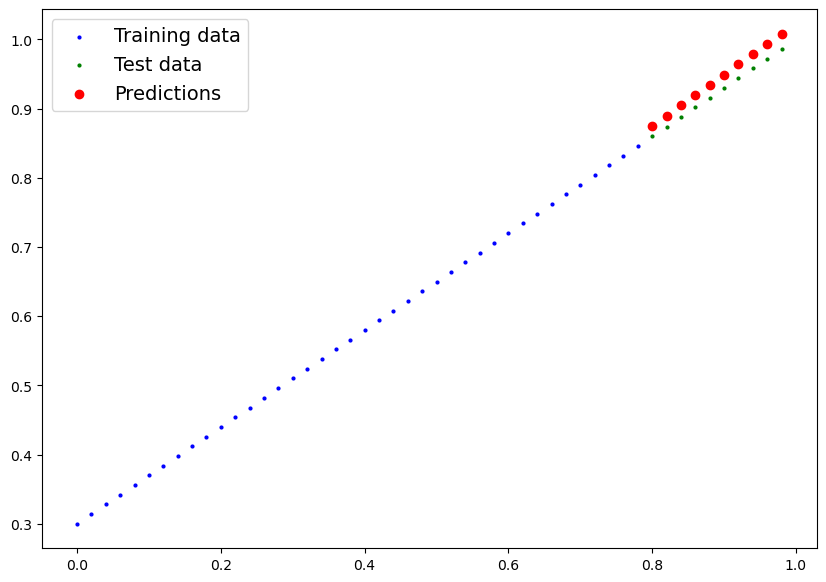

In [505]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions= y_preds_new)

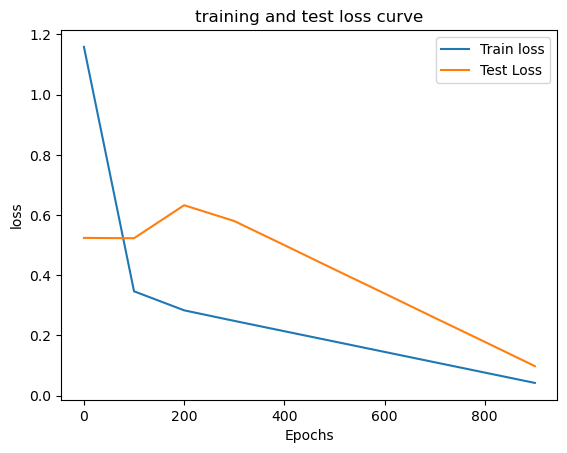

In [506]:
plt.plot(epoch_count, np.array(torch.Tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count,test_loss_values,label = "Test Loss")
plt.title("training and test loss curve")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()

In [508]:
#Saving our model
from pathlib import Path

#Create a model directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok= True)

#Create model save path
MODEL_NAME = "model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#Save model's state dict(or the whole model)
torch.save(obj= model_0.state_dict(),f = MODEL_SAVE_PATH)

In [511]:
#Loading a PyTorch model

#We're loading a state_dict not the model itself, so we gotta instantiate a new model and load our state dict into that model.
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [512]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7399])), ('bias', tensor([0.2830]))])